C:\Users\Administrator\AppData\Local\Temp\ipykernel_10644\1457726623.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(x_q @ theta)


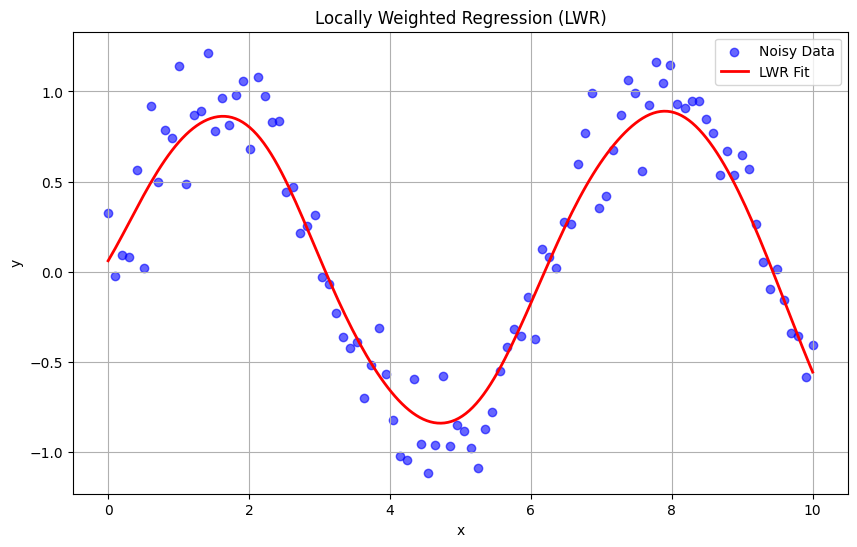

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_weights(x_train, x_query, tau):
    # Gaussian kernel weights for each training point
    diff = x_train - x_query
    weights = np.exp(- (diff ** 2) / (2 * tau ** 2))
    return np.diag(weights.flatten())

def lwr_predict(x_train, y_train, x_query, tau):
    # Add bias term (intercept)
    X = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
    x_q = np.hstack((np.array([[1]]), np.array([[x_query]]).reshape(1, -1)))  # Intercept + query point

    # Compute weights using Gaussian kernel
    W = gaussian_weights(x_train, x_query, tau)

    # Weighted linear regression: theta = (X^T W X)^-1 X^T W y
    theta = np.linalg.pinv(X.T @ W @ X) @ (X.T @ W @ y_train)

    # Make prediction: y = x_q * theta
    return float(x_q @ theta)

# Generate data: y = sin(x) + noise
np.random.seed(1)
x = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(x) + np.random.normal(0, 0.2, size=(100, 1))

# Use all data for training and prediction
tau = 0.5
x_plot = np.linspace(0, 10, 200).reshape(-1, 1)
y_pred = [lwr_predict(x, y, xi, tau) for xi in x_plot]

# Plot original data and LWR predictions
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Noisy Data", color='blue', alpha=0.6)
plt.plot(x_plot, y_pred, label="LWR Fit", color='red', linewidth=2)
plt.title("Locally Weighted Regression (LWR)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
